<a href="https://colab.research.google.com/github/RedaAllouche/essaies-/blob/main/Log_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des bibliothèques

In [ ]:
!pip install xgboost

import pandas as pd

import numpy as np

import matplotlib.pyplot as pyplot
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Sklearn processing

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


# Sklearn classification algorithms

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.utils.class_weight import compute_sample_weight




# Sklearn classification model evaluation function

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import tensorflow as tf
import time

Chargement des données

In [ ]:
data_train = pd.read_csv("UNSW_NB15_training-set.csv")

data_test = pd.read_csv("UNSW_NB15_testing-set.csv")

Visualisation des head

In [ ]:
data_train.head()
data_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Dimensions des tableaux

In [ ]:
print("Train set shape:", data_train.shape)
print("Test set shape:", data_test.shape)


Train set shape: (175341, 45)
Test set shape: (82332, 45)


Types des features

In [ ]:
data_train.dtypes

,0
id,int64
dur,float64
proto,object
service,object
state,object
spkts,int64
dpkts,int64
sbytes,int64
dbytes,int64
rate,float64


Nettoyage des données

Vérification des nulles

In [ ]:
data_train.isnull().mean().sort_values()


,0
id,0.0
dur,0.0
proto,0.0
service,0.0
state,0.0
spkts,0.0
dpkts,0.0
sbytes,0.0
dbytes,0.0
rate,0.0


Statistiques descriptives

In [ ]:
data_train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
print(data_train['attack_cat'].dtype)
print("Avant encodage :")
print(data_train['attack_cat'].unique())
print(data_train['attack_cat'].value_counts())
print(data_test['attack_cat'].unique())
print(data_test['attack_cat'].value_counts())


object
Avant encodage :
['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


Mapping des types d'attaques

In [ ]:
ley = LabelEncoder()
ley.fit(data_train['attack_cat']) # Fit the encoder to the data first
for i, c in enumerate(ley.classes_):
    print(f"{i} → {c}")

0 → Analysis
1 → Backdoor
2 → DoS
3 → Exploits
4 → Fuzzers
5 → Generic
6 → Normal
7 → Reconnaissance
8 → Shellcode
9 → Worms


In [ ]:
# 1 Apprend les classes depuis le TRAIN uniquement
ley.fit(data_train['attack_cat'])
#  Transforme train et test avec le même mapping
data_train['attack_cat'] = ley.transform(data_train['attack_cat'])
data_test['attack_cat'] = ley.transform(data_test['attack_cat'])
print(data_train['attack_cat'].dtype)
print(data_train['attack_cat'].unique())
print(data_train['attack_cat'].value_counts())
print(data_test['attack_cat'].dtype)
print(data_test['attack_cat'].unique())
print(data_test['attack_cat'].value_counts())
print(f"Colonnes identiques: {list(data_test.columns) == list(data_train.columns)}")

int64
[6 1 0 4 8 7 3 2 9 5]
attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64
int64
[6 7 1 2 3 0 4 9 8 5]
attack_cat
6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: count, dtype: int64
Colonnes identiques: True


Inspection des catégories dans les collonnes service, state & protocol

In [ ]:
print("Valeurs de le colonne service")
A = set(data_train['service'].unique())
print(A)
print(data_train['service'].value_counts())
B = set(data_test['service'].unique())
print(B)
print("Présentes dans TRAIN mais pas dans TEST :", A - B)
print("Présentes dans TEST mais pas dans TRAIN :", B - A)
print(data_test['service'].value_counts())
print("Valeurs de le colonne state")
print(data_train['state'].unique())
A = set(data_train['state'].unique())
print(data_test['state'].unique())
B = set(data_test['state'].unique())
print("Présentes dans TRAIN mais pas dans TEST :",A - B)
print("Présentes dans TEST mais pas dans TRAIN :",B - A)
print("Valeurs de le colonne proto")
print(data_train['proto'].unique())
print(data_train['proto'].value_counts())
A = set(data_train['proto'].unique())
print(data_test['proto'].unique())
print(data_test['proto'].value_counts())
B = set(data_test['proto'].unique())

print("Présentes dans TRAIN mais pas dans TEST :",A - B)
print("Présentes dans TEST mais pas dans TRAIN :",B - A)

Valeurs de le colonne service
{'ssl', 'ftp-data', 'snmp', 'dns', 'ssh', 'irc', 'radius', '-', 'pop3', 'ftp', 'smtp', 'http', 'dhcp'}
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64
{'ssl', 'ftp-data', 'dns', 'snmp', 'ssh', 'irc', 'radius', '-', 'pop3', 'ftp', 'smtp', 'http', 'dhcp'}
Présentes dans TRAIN mais pas dans TEST : set()
Présentes dans TEST mais pas dans TRAIN : set()
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64
Valeurs de le colonne state
['FIN' 'INT' 'CON' 'ECO' 'REQ' 'RST' 'PAR' 'URN' 'no']
['INT' 'FIN' 'REQ' 'ACC' 'CON' 'RST' 'CLO']
Prése

In [ ]:
# Avant model.fit
""" print("=== Vérification des colonnes ===")
print("Colonnes de X_train :", X_train.columns.tolist())
print("Nombre de colonnes X_train :", len(X_train.columns))
print("Colonnes de X_test :", X_test.columns.tolist())
print("Nombre de colonnes X_test :", len(X_test.columns))
print("Colonnes manquantes dans X_test :", set(X_train.columns) - set(X_test.columns))
print("Colonnes supplémentaires dans X_test :", set(X_test.columns) - set(X_train.columns))"""

' print("=== Vérification des colonnes ===")\nprint("Colonnes de X_train :", X_train.columns.tolist())\nprint("Nombre de colonnes X_train :", len(X_train.columns))\nprint("Colonnes de X_test :", X_test.columns.tolist())\nprint("Nombre de colonnes X_test :", len(X_test.columns))\nprint("Colonnes manquantes dans X_test :", set(X_train.columns) - set(X_test.columns))\nprint("Colonnes supplémentaires dans X_test :", set(X_test.columns) - set(X_train.columns))'

Traitement des features proto,service & state

In [ ]:
print("\n=== Traitement de 'service' ===")

# Combiner train et test pour avoir toutes les catégories
all_services = set(data_train['service'].unique()) | set(data_test['service'].unique())
print(f"Services uniques (total): {len(all_services)}")

# One-Hot Encoding
data_train = pd.get_dummies(data_train, columns=['service'], prefix='service', drop_first=False)
data_test = pd.get_dummies(data_test, columns=['service'], prefix='service', drop_first=False)

# Aligner les colonnes entre train et test
train_cols = set(data_train.columns)
test_cols = set(data_test.columns)

# Ajouter les colonnes manquantes avec des 0
for col in train_cols - test_cols:
    if col.startswith('service_'):
        data_test[col] = 0

for col in test_cols - train_cols:
    if col.startswith('service_'):
        data_train[col] = 0

# ============================================
# 2.2 Gestion de 'state' - One-Hot avec alignement
# ============================================
print("\n=== Traitement de 'state' ===")

# Identifier toutes les valeurs possibles
all_states = set(data_train['state'].unique()) | set(data_test['state'].unique())
print(f"States uniques (total): {all_states}")

# One-Hot Encoding
data_train = pd.get_dummies(data_train, columns=['state'], prefix='state', drop_first=False)
data_test = pd.get_dummies(data_test, columns=['state'], prefix='state', drop_first=False)

# Aligner les colonnes
train_cols = set(data_train.columns)
test_cols = set(data_test.columns)

for col in train_cols - test_cols:
    if col.startswith('state_'):
        data_test[col] = 0

for col in test_cols - train_cols:
    if col.startswith('state_'):
        data_train[col] = 0

# ============================================
# 2.3 Gestion de 'proto' - Category type (pour XGBoost)
# ============================================
print("\n=== Traitement de 'proto' ===")

# Créer un mapping unifié basé sur toutes les valeurs
all_protos = sorted(set(data_train['proto'].unique()) | set(data_test['proto'].unique()))
proto_mapping = {proto: idx for idx, proto in enumerate(all_protos)}

print(f"Protocoles uniques (total): {len(all_protos)}")

# Appliquer le mapping avec gestion des valeurs manquantes
data_train['proto_encoded'] = data_train['proto'].map(proto_mapping)
data_test['proto_encoded'] = data_test['proto'].map(proto_mapping)

# Gérer les valeurs non mappées (si elles existent)
data_train['proto_encoded'] = data_train['proto_encoded'].fillna(-1).astype(int)
data_test['proto_encoded'] = data_test['proto_encoded'].fillna(-1).astype(int)

# Convertir en category pour XGBoost
data_train['proto_encoded'] = data_train['proto_encoded'].astype('category')
data_test['proto_encoded'] = data_test['proto_encoded'].astype('category')

# Supprimer la colonne originale
data_train.drop('proto', axis=1, inplace=True)
data_test.drop('proto', axis=1, inplace=True)





=== Traitement de 'service' ===
Services uniques (total): 13

=== Traitement de 'state' ===
States uniques (total): {'CLO', 'no', 'URN', 'FIN', 'ACC', 'INT', 'CON', 'RST', 'REQ', 'PAR', 'ECO'}

=== Traitement de 'proto' ===
Protocoles uniques (total): 133


In [ ]:
# ============================================
# 3. PRÉPARATION DES DONNÉES
# ============================================
print("\n=== Préparation finale ===")

# Séparer features et target (ajustez selon votre colonne target)
X_train = data_train.drop(['attack_cat', 'label', 'id'], axis=1)
y_train = data_train['attack_cat']

X_test = data_test.drop(['attack_cat', 'label','id'], axis=1)
y_test = data_test['attack_cat']
# S'assurer que les colonnes sont dans le même ordre
X_test = X_test[X_train.columns]
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Colonnes identiques: {list(X_train.columns) == list(X_test.columns)}")


=== Préparation finale ===

X_train shape: (175341, 64)
X_test shape: (82332, 64)
Colonnes identiques: True


In [ ]:
data_train.dtypes
data_test.dtypes

,0
id,int64
dur,float64
spkts,int64
dpkts,int64
sbytes,int64
...,...
state_PAR,int64
state_URN,int64
state_no,int64
state_ECO,int64


In [ ]:
print(y_train.shape)
print(y_test.shape)

(175341,)
(82332,)


Entrainement du modèle avec XGboost

In [ ]:
print("\n=== Entraînement XGBoost ===")

# Identifier les colonnes catégorielles (proto_encoded)
feature_types = ['c' if col == 'proto_encoded' else 'q' for col in X_train.columns]

# Modèle XGBoost
model = xgb.XGBClassifier(
    enable_categorical=True,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist',  # Nécessaire pour enable_categorical
      objective='multi:softmax'  # ← Ajoutez cette ligne
)

# Entraînement
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=10
)

# ============================================
# 5. ÉVALUATION
# ============================================
print("\n=== Évaluation ===")

# Prédictions
y_pred = model.predict(X_test)

# Métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (top 15)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Features:")
print(feature_importance.head(19))


=== Entraînement XGBoost ===
[0]	validation_0-mlogloss:2.10788
[10]	validation_0-mlogloss:1.53680
[20]	validation_0-mlogloss:1.45579
[30]	validation_0-mlogloss:1.52338
[40]	validation_0-mlogloss:1.61660
[50]	validation_0-mlogloss:1.72689
[60]	validation_0-mlogloss:1.82284
[70]	validation_0-mlogloss:1.79469
[80]	validation_0-mlogloss:1.76846
[90]	validation_0-mlogloss:1.71195
[99]	validation_0-mlogloss:1.68891

=== Évaluation ===

Accuracy: 0.4994

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.00      0.01       677
           1       0.02      0.18      0.03       583
           2       0.03      0.12      0.04      4089
           3       0.54      0.83      0.65     11132
           4       0.25      0.57      0.34      6062
           5       1.00      0.97      0.98     18871
           6       0.98      0.18      0.31     37000
           7       0.94      0.79      0.86      3496
           8       0.00      0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Sélectionner les 15 meilleures features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)
top_15_features = feature_importance['feature'].head(19).tolist()
print("\n=== 15 meilleures features ===")
print(top_15_features)

# Réduire X_train et X_test aux 15 meilleures features
X_train_top15 = X_train[top_15_features]
X_test_top15 = X_test[top_15_features]

# Vérifier l'alignement
print("\n=== Vérification après sélection des features ===")
print("Ordre identique ?", all(X_train_top15.columns == X_test_top15.columns))

# Modèle final
modelf = xgb.XGBClassifier(
    enable_categorical=True,
    max_depth=10,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist'
)

# Entraîner sur les 15 meilleures features
modelf.fit(
    X_train_top15,
    y_train,

    eval_set=[(X_test_top15, y_test)],
    verbose=50
)

# Évaluer
y_pred = modelf.predict(X_test_top15)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=ley.classes_))


=== 15 meilleures features ===
['ct_dst_sport_ltm', 'sttl', 'service_dns', 'dttl', 'ct_srv_dst', 'service_-', 'proto_encoded', 'sbytes', 'dmean', 'synack', 'dbytes', 'ct_dst_src_ltm', 'smean', 'state_CON', 'swin', 'service_ftp-data', 'ct_state_ttl', 'sloss', 'service_http']

=== Vérification après sélection des features ===
Ordre identique ? True
[0]	validation_0-mlogloss:2.15585
[50]	validation_0-mlogloss:1.08301
[100]	validation_0-mlogloss:1.05237
[150]	validation_0-mlogloss:1.13654
[200]	validation_0-mlogloss:1.23531
[250]	validation_0-mlogloss:1.30243
[299]	validation_0-mlogloss:1.35773

Accuracy: 0.6545
                precision    recall  f1-score   support

      Analysis       0.01      0.01      0.01       677
      Backdoor       0.02      0.01      0.01       583
           DoS       0.14      0.17      0.15      4089
      Exploits       0.50      0.93      0.65     11132
       Fuzzers       0.24      0.66      0.36      6062
       Generic       1.00      0.97      0.99 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(X_train.shape)

(175341, 64)


In [ ]:
print("Classes et labels :", {name: idx for idx, name in enumerate(ley.classes_)})
print("Nombre d'échantillons par classe dans y_train :", pd.Series(y_train).value_counts().to_dict())

Classes et labels : {'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}
Nombre d'échantillons par classe dans y_train : {6: 56000, 5: 40000, 3: 33393, 4: 18184, 2: 12264, 7: 10491, 0: 2000, 1: 1746, 8: 1133, 9: 130}


In [ ]:
# Définir le modèle pour RandomizedSearchCV
model = xgb.XGBClassifier(
    enable_categorical=True,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist',

)

# Grille des hyperparamètres
param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

# RandomizedSearchCV avec n_iter=5, cv=2
random_search = RandomizedSearchCV(
    model,
    param_grid,
    n_iter=5,
    cv=2,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train_top15, y_train)  # Sans sample_weights

# Meilleurs paramètres
print("\nMeilleurs paramètres :", random_search.best_params_)
model = random_search.best_estimator_

# Entraîner le modèle final
model.fit(
    X_train_top15,
    y_train,
    eval_set=[(X_test_top15, y_test)],
    verbose=50
)

# Évaluer
y_pred = model.predict(X_test_top15)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=ley.classes_))



Fitting 2 folds for each of 5 candidates, totalling 10 fits

Meilleurs paramètres : {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
[0]	validation_0-mlogloss:2.01793
[49]	validation_0-mlogloss:0.99507

Accuracy: 0.6745
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.08      0.01      0.02       583
           DoS       0.13      0.07      0.09      4089
      Exploits       0.47      0.96      0.63     11132
       Fuzzers       0.24      0.58      0.34      6062
       Generic       1.00      0.97      0.98     18871
        Normal       0.99      0.54      0.70     37000
Reconnaissance       0.96      0.76      0.85      3496
     Shellcode       0.78      0.02      0.04       378
         Worms       0.81      0.48      0.60        44

      accuracy                           0.67     82332
     macro avg       0.55     

In [ ]:
X_train_top15.dtypes

,0
ct_dst_sport_ltm,int64
sttl,int64
service_dns,bool
dttl,int64
ct_srv_dst,int64
service_-,bool
proto_encoded,category
sbytes,int64
dmean,int64
synack,float64


In [ ]:

X_train_top15.drop('proto_encoded', axis=1, inplace=True)
X_test_top15.drop('proto_encoded', axis=1, inplace=True)
# Définir le modèle pour RandomizedSearchCV
model = xgb.XGBClassifier(
    enable_categorical=True,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist',

)

# Grille des hyperparamètres
param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

# RandomizedSearchCV avec n_iter=5, cv=2
random_search = RandomizedSearchCV(
    model,
    param_grid,
    n_iter=5,
    cv=2,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train_top15, y_train)  # Sans sample_weights

# Meilleurs paramètres
print("\nMeilleurs paramètres :", random_search.best_params_)
model = random_search.best_estimator_

# Entraîner le modèle final
model.fit(
    X_train_top15,
    y_train,
    eval_set=[(X_test_top15, y_test)],
    verbose=50
)

# Évaluer
y_pred = model.predict(X_test_top15)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=ley.classes_))



Fitting 2 folds for each of 5 candidates, totalling 10 fits


/tmp/ipython-input-1198718486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_top15.drop('proto_encoded', axis=1, inplace=True)
/tmp/ipython-input-1198718486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_top15.drop('proto_encoded', axis=1, inplace=True)



Meilleurs paramètres : {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
[0]	validation_0-mlogloss:2.12968
[49]	validation_0-mlogloss:0.64086

Accuracy: 0.7630
                precision    recall  f1-score   support

      Analysis       0.11      0.25      0.16       677
      Backdoor       0.12      0.13      0.12       583
           DoS       0.63      0.09      0.16      4089
      Exploits       0.59      0.89      0.71     11132
       Fuzzers       0.28      0.55      0.37      6062
       Generic       1.00      0.97      0.98     18871
        Normal       0.96      0.74      0.84     37000
Reconnaissance       0.93      0.81      0.86      3496
     Shellcode       0.32      0.75      0.45       378
         Worms       0.77      0.39      0.52        44

      accuracy                           0.76     82332
     macro avg       0.57      0.56      0.52     82332
  weighted avg       0.84      0

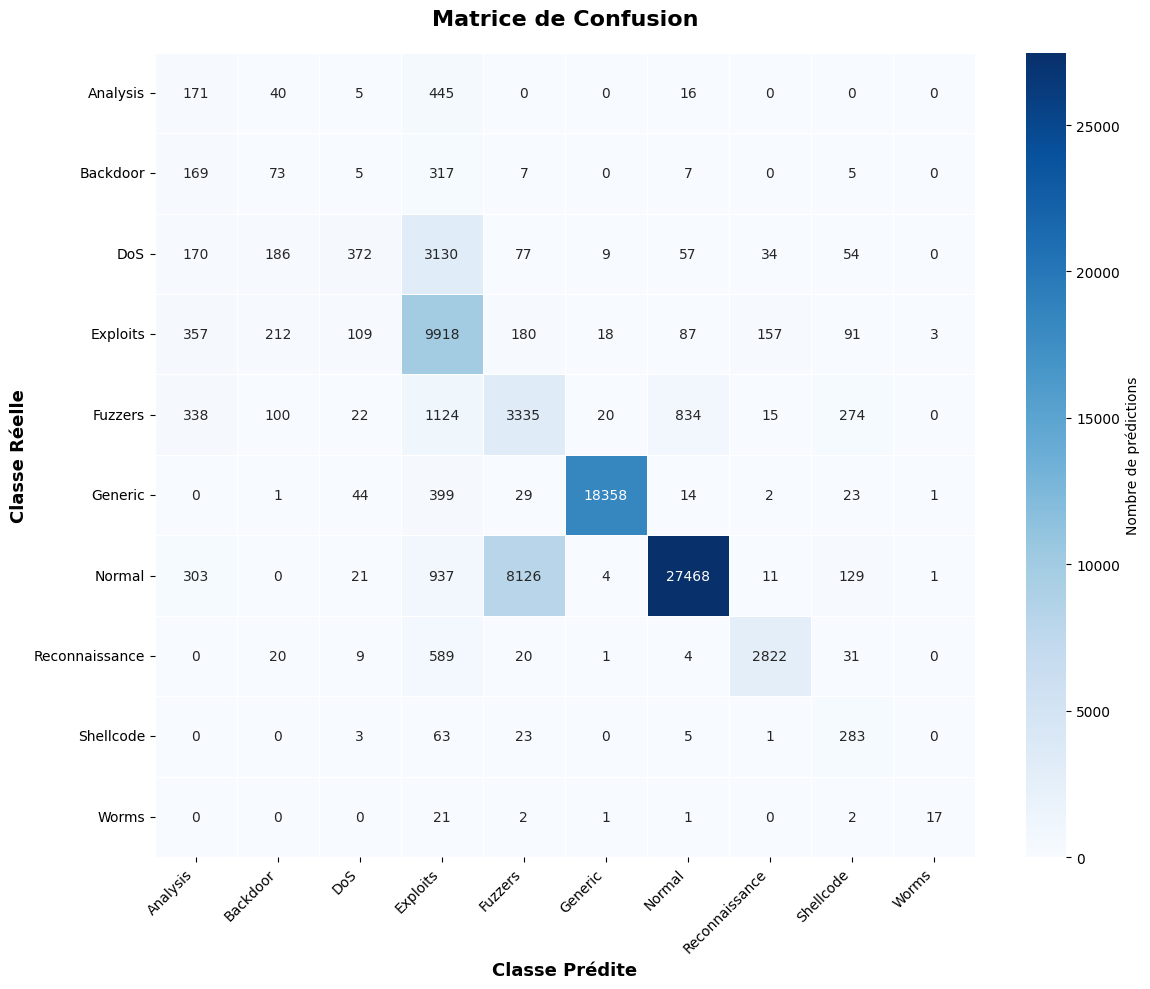

In [ ]:
# Reconvertir les prédictions en noms de classes
y_test_names = ley.inverse_transform(y_test)
y_pred_names = ley.inverse_transform(y_pred)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_names, y_pred_names, labels=ley.classes_)

# ========================================
# Matrice de confusion (valeurs absolues)
# ========================================
pyplot.figure(figsize=(12, 10))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=ley.classes_,
    yticklabels=ley.classes_,
    cbar_kws={'label': 'Nombre de prédictions'},
    linewidths=0.5
)

pyplot.title('Matrice de Confusion', fontsize=16, fontweight='bold', pad=20)
pyplot.xlabel('Classe Prédite', fontsize=13, fontweight='bold')
pyplot.ylabel('Classe Réelle', fontsize=13, fontweight='bold')
pyplot.xticks(rotation=45, ha='right')
pyplot.yticks(rotation=0)
pyplot.tight_layout()
pyplot.show()

Matrice de confusion